#### Подключаем библиотеки

In [1]:
import pandas as pd
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.model_selection import cross_val_score

#### Загрузка данных

In [2]:
df = pd.read_csv('data/Star3642_balanced.csv')

In [3]:
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


Колонки отображаются корректно

In [4]:
df.TargetClass.value_counts()

1    1821
0    1821
Name: TargetClass, dtype: int64

Целевая переменная расределена равномерно

#### Задача классификации звезд --> Задача бинарной классификации

Колонки:

Vmag - Визуальная видимая величина звезды

Plx - Расстояние от звезды до Земли

e_Plx - стандартная ошибка Plx

B-V - индекс цвета 

SpType - Спектральный тип

Amag - Абсолютная величина звезды

TargetClass - Является ли звезда карликовой

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         3642 non-null   float64
 1   Plx          3642 non-null   float64
 2   e_Plx        3642 non-null   float64
 3   B-V          3642 non-null   float64
 4   SpType       3642 non-null   object 
 5   Amag         3642 non-null   float64
 6   TargetClass  3642 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 199.3+ KB


Пропущеных значений нет, следовательно этап с их заменой уходит

Только SpType обладает типом object

In [6]:
df.SpType.value_counts()

K0III         293
K1III         200
K2III         156
G8III         135
F5V           125
             ... 
K0III+...       1
F6Ib-G2Ib       1
K5Ia0-a...      1
G5III/IV        1
O8V             1
Name: SpType, Length: 584, dtype: int64

Можно бы было объединить классы с всего одним примером в один, но наша задача исследовать влияние обучение без учителя, поэтому не будем этим заниматься 

In [7]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,8.120530,7.606153,1.176568,0.827077,16.427388,0.500000
std,1.338875,11.924052,0.919999,0.436699,2.428144,0.500069
min,0.450000,-6.820000,0.470000,-0.196000,2.820000,0.000000
25%,7.370000,2.740000,0.840000,0.487250,15.150312,0.000000
50%,8.390000,4.950000,1.040000,0.867000,16.392485,0.500000
75%,9.060000,8.670000,1.270000,1.136000,18.029836,1.000000
max,12.490000,280.270000,30.290000,2.530000,29.249165,1.000000


Стандартное отклонение для всех фичей кроме Plx мало => Делаем предположение о нормальности их распределений

In [8]:
df.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

In [9]:
# Переводим значения в числовую шкалу
cols = ['SpType']

le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [10]:
#разделим датасет на X и у
X = df.drop(["TargetClass"], axis=1)
Y = df["TargetClass"]

In [11]:
# Разделяем набор данных на тестовую и обучающую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Построим какую-нибудь модельку, например KNN и посмотрим на её скорость и скор

#### Пострение модели

In [12]:
%%time
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

Wall time: 8.66 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Смотрим скор на кросс-валидации

In [13]:
cross_val_score(model_knn,X_train, Y_train, cv=4).mean()

0.9152645384172478

# Модель обучается в среднем примерно за 9 ms

In [14]:
Y_pred = model_knn.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       544
           1       0.92      0.93      0.92       549

    accuracy                           0.92      1093
   macro avg       0.92      0.92      0.92      1093
weighted avg       0.92      0.92      0.92      1093



Так как целевой класс сбалансирован, можем спокойно ориентировтаься на accuracy

Text(0.5, 12.5, 'Предсказанные значения')

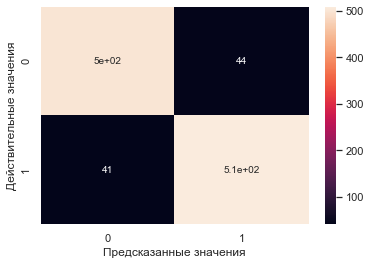

In [15]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Теперь попробуем понизить размерность и тем самым увеличить скорость работы алгоритма

#### Понижение размерности

In [16]:
pca = PCA(n_components= 1)
principalComponents = pca.fit_transform(X)


In [17]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

principalDf.head()

,principal component 1
0,-176.031431
1,246.969041
2,8.963898
3,195.967552
4,52.977286


In [18]:
# Разделяем набор данных на тестовую и обучающую выборку
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.30, random_state = 101)

In [19]:
%%time
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

Wall time: 3.2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Смотрим скор на кросс-валидации

In [20]:
cross_val_score(model_knn,X_train, Y_train, cv=4).mean()

0.9144728424285075

In [21]:
Y_pred = model_knn.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       546
           1       0.93      0.96      0.94       547

    accuracy                           0.94      1093
   macro avg       0.94      0.94      0.94      1093
weighted avg       0.94      0.94      0.94      1093



Text(0.5, 12.5, 'Предсказанные значения')

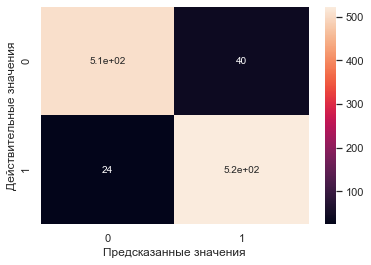

In [22]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(Y_test, Y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Таким образом мы увеличили скорость работы алгоритма почти в 3 раза, при этом accuracy скор не просто не упал, а даже немного вырос на тесте (На кросс-валидации значние осталось примерно тем же)